### Name - Rohan Sanjay Satkar
### Roll No - 60
### Pid no -  246050
### Date - 2/02/2026
### Expt.-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.

## OLS

In [48]:
# Step 1 : Import Libraries
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [49]:
# Step 2 : Input Data
X = np.array([1,2,3]).reshape(-1,1)  # input 
y = np.array([2,3,5])   # output

In [50]:
# Step 3: Create model and fit 
model= LinearRegression()
model.fit(X,y)

LinearRegression()

In [51]:
# Step 4 : Get coefficients (MLE estimates)
w = model.coef_[0]
b = model.intercept_

print(f"w(slope) = {w}")
print(f"b(slope) = {b}")

w(slope) = 1.4999999999999993
b(slope) = 0.3333333333333348


In [52]:
# Step 6 : Make predictions 
y_pred = model.predict(X)
print("\nPredictions for training data:")
for xi,yi,ypi in zip (X.flatten(),y,y_pred):
    print(f"X={xi}, Actual Sales ={yi},Predicted Sales = {ypi:.2f}")
    



Predictions for training data:
X=1, Actual Sales =2,Predicted Sales = 1.83
X=2, Actual Sales =3,Predicted Sales = 3.33
X=3, Actual Sales =5,Predicted Sales = 4.83


In [53]:
# Step 7 : Calculated metrics
mse = mean_squared_error (y,y_pred)
r2 = r2_score(y,y_pred)

print (f"\nMean Squared Error (MSE) = {mse:.4f}")
print (f"R^2 Score = {r2:.4f}")


Mean Squared Error (MSE) = 0.0556
R^2 Score = 0.9643


## MLE

In [54]:
from scipy.optimize import minimize 

In [55]:
# Step 2 : Input Data
X = np.array([1,2,3]) # input 
y = np.array([2,3,5])   # output

In [56]:
# Step 3: Negative Log Likelihood function
def neg_log_likelihood(parms):
    w, b = parms
    sigma2 = 1  #assume varience = 1
    y_pred = w*X + b
    nll = 0.5*np.sum((y-y_pred)**2 / sigma2)
    return nll

# Intialize guess for w, b 
initial_guess = [0,0]

# Minimize negative log-likelihood 
result = minimize(neg_log_likelihood , initial_guess)
w_mle, b_mle = result.x

print (f"MLE w = {w_mle}")
print (f"MLE b = {b_mle}")

MLE w = 1.500000003897125
MLE b = 0.3333333918730798


In [57]:
 # Step 6: Prediction
y_pred = w_mle*X + b_mle
print("Predictions for training data\n")
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    print(f"X = {xi}, Actual y = {yi}, Predicted y = {ypi}")

Predictions for training data

X = 1, Actual y = 2, Predicted y = 1.833333395770205
X = 2, Actual y = 3, Predicted y = 3.33333339966733
X = 3, Actual y = 5, Predicted y = 4.833333403564454


In [58]:
# Step 7:  Calculate metrics 
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error is: {mse}")
print(f"R2_Score is: {r2}")

Mean Squared Error is: 0.05555555555556004
R2_Score is: 0.9642857142857114


## Gradient Descent 

In [59]:
# Step 1: Imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [60]:
# Step 2: Input data
X = np.array([1,2,3])
y = np.array([2,3,5])

In [61]:
# Step 3:
w, b = 0, 0
alpha = 0.001
n_iter = 100000
n = len(X)

for i in range(n_iter):
    y_pred = w*X.flatten() + b
    dw = (-2/n)*np.sum(X.flatten()*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)
    w -= alpha*dw
    b -= alpha*db

print(f"Slope is: {w}\nIntercept is: {b}")

Slope is: 1.49999999999562
Intercept is: 0.33333333334329107


In [62]:
# Step 6 : Make Predictions 
# Make predictions using estimated parameters 
y_pred = w *X + b
print("Predictions for training data\n")
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    print(f"X = {xi}, Actual y = {yi}, Predicted y = {ypi}")

Predictions for training data

X = 1, Actual y = 2, Predicted y = 1.833333333338911
X = 2, Actual y = 3, Predicted y = 3.333333333334531
X = 3, Actual y = 5, Predicted y = 4.833333333330152


In [63]:
# Step 7:  Calculate metrics 
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error is: {mse}")
print(f"R2_Score is: {r2}")

Mean Squared Error is: 0.05555555555555553
R2_Score is: 0.9642857142857143


## Gradient Descent With Single Parameters 

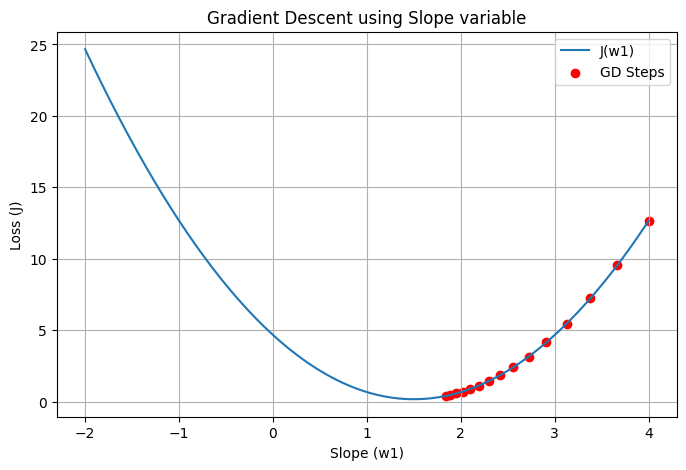

In [67]:
# Step 2 : Data 
X = np.array([1,2,3])
y = np.array([2,3,5])
n = len(X)


# Step 3: Calculate loss function

def loss(w1):
    w0 = np.mean(y) - w1*np.mean(X)
    y_pred = w1*X + w0
    return np.sum((y-y_pred)**2)

#Step 4: Calculate Gradient of J wrt w1

def gradient(w1):
    w0 = np.mean(y) - w1*np.mean(X)
    y_pred = w1*X + w0
    return (-2/n)*np.sum(X*(y-y_pred))


# Gradient Descent
w = 4
lr = 0.1
epochs = 15

w1_values = []
loss_values = []

for _ in range(epochs):
    w1_values.append(w)
    loss_values.append(loss(w))
    w = w - lr * gradient(w)

# Plot loss curve and GD steps
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(wi) for wi in w_space]

plt.figure(figsize=(8, 5))
plt.plot(w_space, loss_space, label="J(w1)")
plt.scatter(w1_values, loss_values, color="red", label="GD Steps")
plt.xlabel("Slope (w1)")
plt.ylabel("Loss (J)")
plt.title("Gradient Descent using Slope variable")
plt.legend()
plt.grid(True)
plt.show()